In [47]:
import pandas as pd, numpy as np, plotly.express as px, seaborn as sns

In [48]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [49]:
import pandas as pd

df = pd.read_excel('predicted_unsupervised_sentiment.xlsx')
display(df)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,sentence,sentiment
0,0,NaN,NaN,ওয়ও আমি গর্বিত বাঙ্গালি,1
1,1,NaN,NaN,বাংলাদেশ এর কিছু মানুষ নিজে কিছু করতে পারবেনা ...,0
2,2,NaN,NaN,রামোসের ঘুম আসে না,0
3,3,NaN,NaN,কোহলির প্রতি শ্রদ্ধা হারিয়ে ফেলছি,1
4,4,NaN,NaN,থ্যাঙ্ক ইউ মাছরাঙ্গা টেলিভিশনকিন্তু ছাপোষা আন্...,0
...,...,...,...,...,...
6647,6647,NaN,NaN,আমি কখনো আশা করিনি যে আমি আমার স্বপ্নের প্রিয় ...,1
6648,6648,NaN,NaN,মিডিয়া লিটনকে একজন খারাপ মানুষ হিসেবে প্রতিষ্ঠ...,0
6649,6649,NaN,NaN,বাংলাদেশের জন্ম কিংবা তার পূর্বের ইতিহাস অনেকে...,0
6650,6650,NaN,NaN,আপনারা সিম নিবন্দন করালেন বাংলাদেশে অপরাধ কমবে...,0


## Data exploration and processing 

In [50]:
df.shape

(6652, 5)

In [51]:
# Display general information about the DataFrame
print("DataFrame Information:")
print(df.info())

# Display the number of rows and columns in the DataFrame
print("\nDataFrame Shape:")
print(df.shape)

# Display the total number of elements in the DataFrame
print("\nDataFrame Size:")
print(df.size)

# Display descriptive statistics of the DataFrame
print("\nDataFrame Descriptive Statistics:")
print(df.describe())

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Display the last few rows of the DataFrame
print("\nLast few rows of the DataFrame:")
print(df.tail())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6652 entries, 0 to 6651
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6652 non-null   int64  
 1   Unnamed: 1  0 non-null      float64
 2   Unnamed: 2  0 non-null      float64
 3   sentence    6652 non-null   object 
 4   sentiment   6652 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 260.0+ KB
None

DataFrame Shape:
(6652, 5)

DataFrame Size:
33260

DataFrame Descriptive Statistics:
        Unnamed: 0  Unnamed: 1  Unnamed: 2    sentiment
count  6652.000000         0.0         0.0  6652.000000
mean   3325.500000         NaN         NaN     0.456554
std    1920.411327         NaN         NaN     0.498146
min       0.000000         NaN         NaN     0.000000
25%    1662.750000         NaN         NaN     0.000000
50%    3325.500000         NaN         NaN     0.000000
75%    4988.250000         NaN       

<Axes: ylabel='count'>

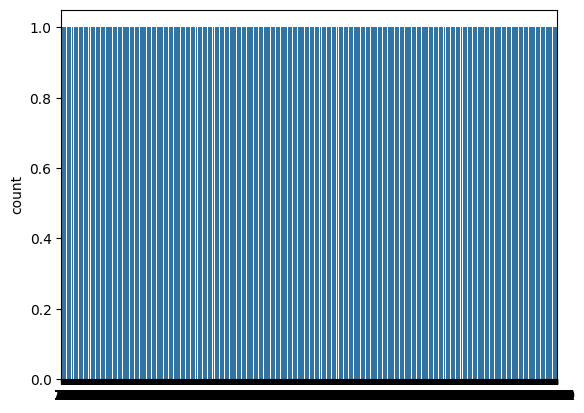

In [52]:
sns.countplot(df['sentiment'])

In [53]:
df.reset_index(drop=True, inplace=True)

In [54]:
import re

In [55]:
df['sentence'] = df.sentence.apply(lambda x: preprocessing(str(x)))

In [56]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,sentence,sentiment
0,0,NaN,NaN,ওয়ও আমি গর্বিত বাঙ্গালি,1
1,1,NaN,NaN,বাংলাদেশ এর কিছু মানুষ নিজে কিছু করতে পারবেনা ...,0
2,2,NaN,NaN,রামোসের ঘুম আসে না,0
3,3,NaN,NaN,কোহলির প্রতি শ্রদ্ধা হারিয়ে ফেলছি,1
4,4,NaN,NaN,থ্যাঙ্ক ইউ মাছরাঙ্গা টেলিভিশনকিন্তু ছাপোষা আন্...,0
